# Library, Path, Data

In [50]:
import pandas as pd
import os, sys, shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ROOT_DIR = './'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'Data')

In [3]:
train = pd.read_csv(os.path.join(DATA_ROOT_DIR, 'movies_train.csv'))
test = pd.read_csv(os.path.join(DATA_ROOT_DIR, 'movies_test.csv'))
submission = pd.read_csv(os.path.join(DATA_ROOT_DIR, 'submission.csv'))

# EDA

In [28]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

dir_prev_bfnum has Nan

In [29]:
train.dir_prev_bfnum.fillna(0, inplace=True)

replace Nan with zero

In [31]:
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [38]:
numeric_col = [col for col in train.columns if train[col].dtype != object]
categori_col = ['distributor', 'genre', 'screening_rat']

In [41]:
train[numeric_col].describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [42]:
train[categori_col].describe()

,distributor,genre,screening_rat
count,600,600,600
unique,169,12,4
top,CJ 엔터테인먼트,드라마,청소년 관람불가
freq,54,221,204


<AxesSubplot:>

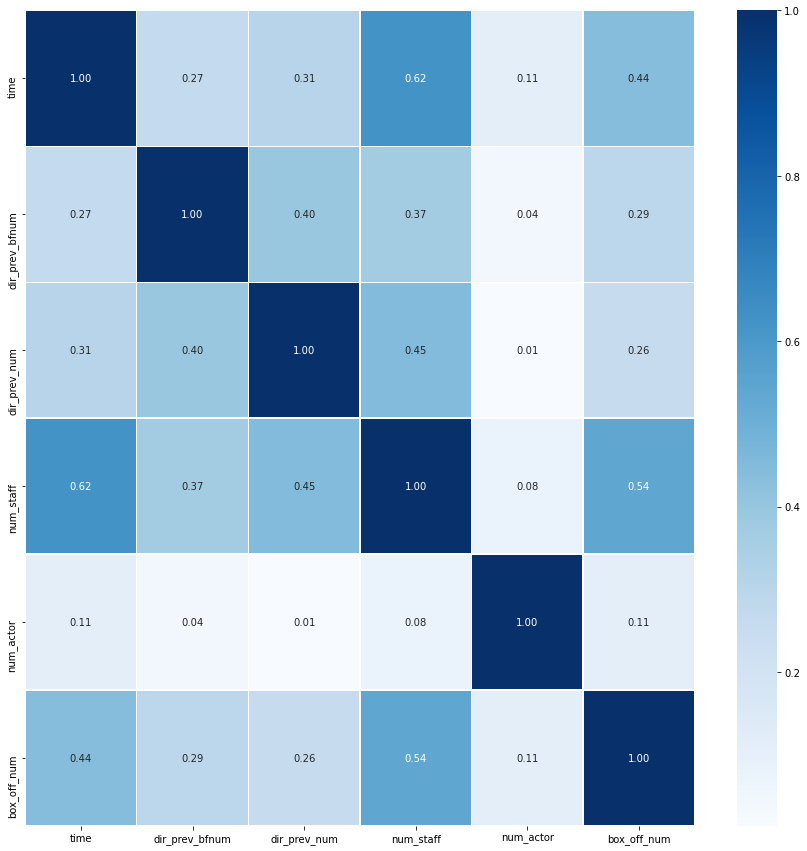

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train[numeric_col].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

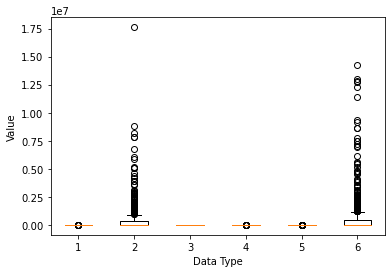

In [73]:
fig, ax = plt.subplots()

ax.boxplot(train[numeric_col])
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()